In [42]:
%%capture
!pip install wandb -qU

In [43]:
# Log in to your W&B account
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# GPU Setting

## 런타임 > 런타임 유형변경 > T4 GPU

In [2]:
import os
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
now_path = '/content/gdrive/MyDrive/Colab Notebooks/SMWU/2024/'
os.chdir(now_path)

# 1. Preprocessing

In [137]:
config  = {
    'epochs': 500,
    'batch_size': 64,
    'weight_decay': 0.0005,
    'learning_rate': 1e-3,
    'seed': 42
    }

In [138]:
wandb.init(project='test-pytorch', config=config)
wandb.run.name = 'Lab_Data' ## Run name
wandb.run.save()
config = wandb.config

train_loss,█▄▂▂▁
val_loss,█▄▃▂▁
train_loss,0.43191
val_loss,0.58731


## 1.1 Setting

### Library 준비

In [4]:
import pandas as pd
import numpy as np

### EDA (Exploratory Data Analysis)

**데이터 불러오기**

In [22]:
df= pd.read_csv('merge_prep.csv')
df

,PTID,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,...,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,AV45_bl
0,002_S_0295,194.0,0.52,31.0,33.0,0.17,0.03,182.0,66.6,23.2,...,NaN,NaN,NaN,NaN,NaN,888.1,355.2,34.73,NaN,NaN
1,002_S_0413,433.0,0.23,30.0,33.0,0.18,0.02,155.0,53.5,34.5,...,NaN,NaN,NaN,NaN,NaN,1006.0,107.3,10.57,NaN,NaN
2,002_S_0559,452.0,0.42,30.0,33.0,0.26,0.03,156.0,71.2,20.0,...,NaN,NaN,NaN,NaN,NaN,1245.0,188.6,15.82,NaN,NaN
3,002_S_0619,642.0,0.21,33.0,32.0,0.19,0.05,228.0,66.1,25.6,...,NaN,NaN,NaN,NaN,NaN,393.8,212.4,18.56,NaN,NaN
4,002_S_0685,322.0,0.39,30.0,33.0,0.19,0.08,357.0,62.8,27.4,...,NaN,NaN,NaN,NaN,NaN,1700.0,265.9,22.82,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,941_S_4376,525.0,0.21,31.0,32.0,0.12,0.09,209.0,54.8,35.3,...,1.00000,1.0,1.00000,1.0,1.00000,1700.0,277.0,23.97,1.303080,0.9419
1596,941_S_4377,256.0,0.59,30.0,34.0,0.11,0.04,262.0,51.6,37.2,...,2.00000,2.2,2.00000,2.5,2.15385,1349.0,312.6,26.47,1.392690,1.1362
1597,941_S_4420,747.0,0.50,31.0,33.0,0.07,0.02,180.0,60.9,26.4,...,1.00000,1.0,1.50000,NaN,1.41935,795.0,339.4,32.22,1.229150,1.3555
1598,941_S_4764,454.0,0.40,32.0,35.0,0.15,0.05,250.0,55.7,32.7,...,1.14286,1.4,1.20000,1.5,1.23684,912.4,295.5,27.57,1.340120,1.2638


**문자형 데이터가 있는지 확인**




In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PTID                      1600 non-null   object 
 1   BAT126                    1577 non-null   float64
 2   HMT10                     1581 non-null   float64
 3   HMT100                    1580 non-null   float64
 4   HMT102                    1577 non-null   float64
 5   HMT11                     1581 non-null   float64
 6   HMT12                     1581 non-null   float64
 7   HMT13                     1564 non-null   float64
 8   HMT15                     1581 non-null   float64
 9   HMT16                     1581 non-null   float64
 10  HMT17                     1581 non-null   float64
 11  HMT18                     1581 non-null   float64
 12  HMT19                     1581 non-null   float64
 13  HMT2                      1578 non-null   float64
 14  HMT3    

환자 ID인 PTID, 진단결과에 해당하는 DX_bl 두가지만 문자형에 해당

MNIST에서 레이블을 0부터 9로 임베딩했듯이, DX_bl도 0부터 4로 임베딩

In [24]:
df['DX_bl']

,DX_bl
0,CN
1,CN
2,CN
3,AD
4,CN
...,...
1595,CN
1596,LMCI
1597,EMCI
1598,EMCI


In [13]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
df['DX_bl'] = le.fit_transform(df['DX_bl'])
df['DX_bl']

,DX_bl
0,1
1,1
2,1
3,0
4,1
...,...
1595,1
1596,3
1597,2
1598,2


In [28]:
print(list(le.classes_))
print(le.transform(list(le.classes_)))

['AD', 'CN', 'EMCI', 'LMCI', 'SMC']
[0 1 2 3 4]


**불필요한 데이터 제거**

이번 task에서 환자 아이디는 불필요하므로 삭제

In [29]:
df_clean = df.drop(['PTID'], axis=1)
df_clean

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,AV45_bl
0,194.0,0.52,31.0,33.0,0.17,0.03,182.0,66.6,23.2,7.3,...,NaN,NaN,NaN,NaN,NaN,888.1,355.2,34.73,NaN,NaN
1,433.0,0.23,30.0,33.0,0.18,0.02,155.0,53.5,34.5,6.5,...,NaN,NaN,NaN,NaN,NaN,1006.0,107.3,10.57,NaN,NaN
2,452.0,0.42,30.0,33.0,0.26,0.03,156.0,71.2,20.0,5.2,...,NaN,NaN,NaN,NaN,NaN,1245.0,188.6,15.82,NaN,NaN
3,642.0,0.21,33.0,32.0,0.19,0.05,228.0,66.1,25.6,3.9,...,NaN,NaN,NaN,NaN,NaN,393.8,212.4,18.56,NaN,NaN
4,322.0,0.39,30.0,33.0,0.19,0.08,357.0,62.8,27.4,5.8,...,NaN,NaN,NaN,NaN,NaN,1700.0,265.9,22.82,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,525.0,0.21,31.0,32.0,0.12,0.09,209.0,54.8,35.3,4.9,...,1.00000,1.0,1.00000,1.0,1.00000,1700.0,277.0,23.97,1.303080,0.9419
1596,256.0,0.59,30.0,34.0,0.11,0.04,262.0,51.6,37.2,8.8,...,2.00000,2.2,2.00000,2.5,2.15385,1349.0,312.6,26.47,1.392690,1.1362
1597,747.0,0.50,31.0,33.0,0.07,0.02,180.0,60.9,26.4,10.8,...,1.00000,1.0,1.50000,NaN,1.41935,795.0,339.4,32.22,1.229150,1.3555
1598,454.0,0.40,32.0,35.0,0.15,0.05,250.0,55.7,32.7,7.8,...,1.14286,1.4,1.20000,1.5,1.23684,912.4,295.5,27.57,1.340120,1.2638


**통계치 확인**

In [30]:
df_clean.describe()

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,AV45_bl
count,1577.000000,1581.000000,1580.000000,1577.000000,1581.000000,1581.000000,1564.000000,1581.000000,1581.000000,1581.000000,...,776.000000,784.000000,755.000000,773.000000,788.000000,1102.000000,1102.000000,1102.000000,1177.000000,778.000000
mean,566.524096,0.407951,30.208544,33.374128,0.173599,0.049137,242.377238,62.050601,28.123529,6.353352,...,1.487224,1.605974,1.712870,1.896938,1.748742,966.551089,287.798475,27.777287,1.201313,1.220553
std,469.805668,0.140203,1.929002,1.242558,0.138966,0.031879,61.250242,8.325793,7.746441,1.775199,...,0.712218,0.792347,0.883444,0.921568,0.735403,456.662658,133.131709,14.619256,0.160679,0.233925
min,96.000000,0.140000,20.000000,29.000000,0.000000,0.000000,100.000000,32.000000,8.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,80.000000,8.000000,0.621933,0.826200
25%,323.000000,0.310000,29.000000,33.000000,0.090000,0.030000,199.000000,56.700000,22.800000,5.200000,...,1.000000,1.000000,1.000000,1.000000,1.153850,589.825000,193.925000,17.440000,1.103510,1.023375
50%,451.000000,0.390000,30.000000,33.000000,0.140000,0.040000,235.000000,62.200000,27.800000,6.100000,...,1.142860,1.200000,1.333330,1.750000,1.480085,832.450000,258.750000,24.170000,1.206340,1.153500
75%,639.000000,0.480000,31.000000,34.000000,0.220000,0.060000,277.000000,67.700000,32.800000,7.300000,...,1.714290,2.000000,2.166670,2.500000,2.162060,1379.750000,350.575000,34.125000,1.310340,1.407675
max,6725.000000,1.340000,36.000000,37.000000,2.150000,0.270000,545.000000,88.000000,62.000000,19.000000,...,4.000000,4.000000,4.000000,4.000000,3.948720,1700.000000,1300.000000,120.000000,1.643600,2.010100


클래스 imbalance가 존재함.

In [149]:
df_clean['DX_bl'].value_counts()

,count
DX_bl,
3,556
1,411
2,307
0,306
4,20


**결측치 처리**

In [31]:
df_clean.isna().sum(axis=0) ## Column별로 결측값의 개수를 파악

,0
BAT126,23
HMT10,19
HMT100,20
HMT102,23
HMT11,19
...,...
ABETA_bl,498
TAU_bl,498
PTAU_bl,498
FDG_bl,423


In [32]:
print(sum(df_clean.isna().sum(axis=0)==0)) ## 값이 모두 존재하는 column 개수
print(sum(df_clean.isna().sum(axis=1)==0)) ## 값이 모두 존재하는 row 개수

3
446


<Axes: >

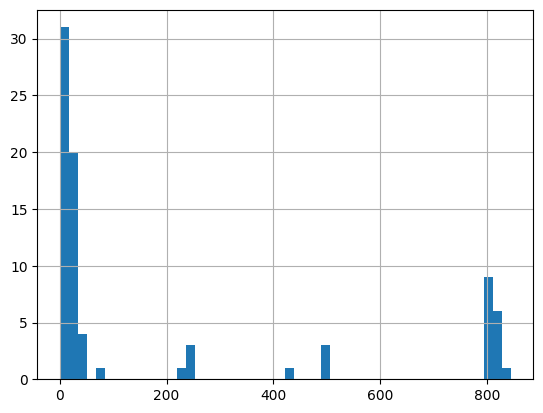

In [33]:
df_na = df_clean.isna().sum(axis=0)
df_na.hist(bins=50)

결측값 처리 1. 그냥 다 0으로 채운다

In [34]:
df_fillna = df_clean.fillna(0)
df_fillna

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,AV45_bl
0,194.0,0.52,31.0,33.0,0.17,0.03,182.0,66.6,23.2,7.3,...,0.00000,0.0,0.00000,0.0,0.00000,888.1,355.2,34.73,0.000000,0.0000
1,433.0,0.23,30.0,33.0,0.18,0.02,155.0,53.5,34.5,6.5,...,0.00000,0.0,0.00000,0.0,0.00000,1006.0,107.3,10.57,0.000000,0.0000
2,452.0,0.42,30.0,33.0,0.26,0.03,156.0,71.2,20.0,5.2,...,0.00000,0.0,0.00000,0.0,0.00000,1245.0,188.6,15.82,0.000000,0.0000
3,642.0,0.21,33.0,32.0,0.19,0.05,228.0,66.1,25.6,3.9,...,0.00000,0.0,0.00000,0.0,0.00000,393.8,212.4,18.56,0.000000,0.0000
4,322.0,0.39,30.0,33.0,0.19,0.08,357.0,62.8,27.4,5.8,...,0.00000,0.0,0.00000,0.0,0.00000,1700.0,265.9,22.82,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,525.0,0.21,31.0,32.0,0.12,0.09,209.0,54.8,35.3,4.9,...,1.00000,1.0,1.00000,1.0,1.00000,1700.0,277.0,23.97,1.303080,0.9419
1596,256.0,0.59,30.0,34.0,0.11,0.04,262.0,51.6,37.2,8.8,...,2.00000,2.2,2.00000,2.5,2.15385,1349.0,312.6,26.47,1.392690,1.1362
1597,747.0,0.50,31.0,33.0,0.07,0.02,180.0,60.9,26.4,10.8,...,1.00000,1.0,1.50000,0.0,1.41935,795.0,339.4,32.22,1.229150,1.3555
1598,454.0,0.40,32.0,35.0,0.15,0.05,250.0,55.7,32.7,7.8,...,1.14286,1.4,1.20000,1.5,1.23684,912.4,295.5,27.57,1.340120,1.2638


결측값 처리 2. 칼럼별로 개수를 세서 500개 이상 비어있는 column은 삭제 후 0으로 채우기

In [35]:
null_dict = dict(df_clean.isnull().sum())
null_dict_sort = sorted(null_dict.items(), key=lambda x: x[1])
null_dict_sort

[('DX_bl', 0),
 ('CDRSB_bl', 0),
 ('MMSE_bl', 0),
 ('LDELTOTAL_BL', 2),
 ('mPACCdigit_bl', 2),
 ('mPACCtrailsB_bl', 2),
 ('ADASQ4_bl', 3),
 ('RCT12', 5),
 ('RCT1407', 5),
 ('RCT183', 5),
 ('RCT3', 5),
 ('RCT392', 5),
 ('RCT6', 5),
 ('RCT8', 5),
 ('RCT19', 6),
 ('RCT20', 6),
 ('RCT9', 6),
 ('ADAS11_bl', 6),
 ('RAVLT_immediate_bl', 6),
 ('RAVLT_learning_bl', 6),
 ('RAVLT_forgetting_bl', 6),
 ('RCT1', 8),
 ('RCT11', 8),
 ('RCT13', 8),
 ('RCT4', 8),
 ('RCT14', 9),
 ('RAVLT_perc_forgetting_bl', 11),
 ('FAQ_bl', 11),
 ('ICV_bl', 11),
 ('APOE4', 12),
 ('ADAS13_bl', 16),
 ('RCT5', 17),
 ('HMT10', 19),
 ('HMT11', 19),
 ('HMT12', 19),
 ('HMT15', 19),
 ('HMT16', 19),
 ('HMT17', 19),
 ('HMT18', 19),
 ('HMT19', 19),
 ('HMT3', 19),
 ('HMT40', 19),
 ('HMT7', 19),
 ('HMT8', 19),
 ('HMT9', 19),
 ('HMT100', 20),
 ('HMT2', 22),
 ('RCT29', 22),
 ('BAT126', 23),
 ('HMT102', 23),
 ('HMT4', 23),
 ('HMT13', 36),
 ('WholeBrain_bl', 38),
 ('TRABSCOR_bl', 40),
 ('RCT1408', 48),
 ('Ventricles_bl', 71),
 ('Hippoca

In [36]:
null_cols = [k for k,v in null_dict.items() if v >500] ##
null_cols

['MOCA_bl',
 'EcogPtMem_bl',
 'EcogPtLang_bl',
 'EcogPtVisspat_bl',
 'EcogPtPlan_bl',
 'EcogPtOrgan_bl',
 'EcogPtDivatt_bl',
 'EcogPtTotal_bl',
 'EcogSPMem_bl',
 'EcogSPLang_bl',
 'EcogSPVisspat_bl',
 'EcogSPPlan_bl',
 'EcogSPOrgan_bl',
 'EcogSPDivatt_bl',
 'EcogSPTotal_bl',
 'AV45_bl']

In [37]:
df_drop1 = df_clean.drop(null_cols, axis=1)
df_drop1

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl
0,194.0,0.52,31.0,33.0,0.17,0.03,182.0,66.6,23.2,7.3,...,7068.0,1076350.0,3619.0,16561.0,19829.0,1633860.0,888.1,355.2,34.73,NaN
1,433.0,0.23,30.0,33.0,0.18,0.02,155.0,53.5,34.5,6.5,...,6905.0,1052840.0,4133.0,20208.0,20341.0,1599490.0,1006.0,107.3,10.57,NaN
2,452.0,0.42,30.0,33.0,0.26,0.03,156.0,71.2,20.0,5.2,...,7651.0,1096860.0,3974.0,18629.0,22649.0,1698570.0,1245.0,188.6,15.82,NaN
3,642.0,0.21,33.0,32.0,0.19,0.05,228.0,66.1,25.6,3.9,...,5812.0,1075140.0,2773.0,20675.0,19959.0,2057400.0,393.8,212.4,18.56,NaN
4,322.0,0.39,30.0,33.0,0.19,0.08,357.0,62.8,27.4,5.8,...,7194.0,989449.0,4201.0,13629.0,18673.0,1529390.0,1700.0,265.9,22.82,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,525.0,0.21,31.0,32.0,0.12,0.09,209.0,54.8,35.3,4.9,...,6812.0,955752.0,NaN,NaN,NaN,1373520.0,1700.0,277.0,23.97,1.303080
1596,256.0,0.59,30.0,34.0,0.11,0.04,262.0,51.6,37.2,8.8,...,6287.0,862889.0,3358.0,15040.0,16425.0,1310960.0,1349.0,312.6,26.47,1.392690
1597,747.0,0.50,31.0,33.0,0.07,0.02,180.0,60.9,26.4,10.8,...,7734.0,1131090.0,4668.0,16809.0,17779.0,1656910.0,795.0,339.4,32.22,1.229150
1598,454.0,0.40,32.0,35.0,0.15,0.05,250.0,55.7,32.7,7.8,...,6238.0,927968.0,4248.0,17877.0,18163.0,1484590.0,912.4,295.5,27.57,1.340120


In [38]:
df_fillna2 = df_drop1.fillna(0)
df_fillna2

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl
0,194.0,0.52,31.0,33.0,0.17,0.03,182.0,66.6,23.2,7.3,...,7068.0,1076350.0,3619.0,16561.0,19829.0,1633860.0,888.1,355.2,34.73,0.000000
1,433.0,0.23,30.0,33.0,0.18,0.02,155.0,53.5,34.5,6.5,...,6905.0,1052840.0,4133.0,20208.0,20341.0,1599490.0,1006.0,107.3,10.57,0.000000
2,452.0,0.42,30.0,33.0,0.26,0.03,156.0,71.2,20.0,5.2,...,7651.0,1096860.0,3974.0,18629.0,22649.0,1698570.0,1245.0,188.6,15.82,0.000000
3,642.0,0.21,33.0,32.0,0.19,0.05,228.0,66.1,25.6,3.9,...,5812.0,1075140.0,2773.0,20675.0,19959.0,2057400.0,393.8,212.4,18.56,0.000000
4,322.0,0.39,30.0,33.0,0.19,0.08,357.0,62.8,27.4,5.8,...,7194.0,989449.0,4201.0,13629.0,18673.0,1529390.0,1700.0,265.9,22.82,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,525.0,0.21,31.0,32.0,0.12,0.09,209.0,54.8,35.3,4.9,...,6812.0,955752.0,0.0,0.0,0.0,1373520.0,1700.0,277.0,23.97,1.303080
1596,256.0,0.59,30.0,34.0,0.11,0.04,262.0,51.6,37.2,8.8,...,6287.0,862889.0,3358.0,15040.0,16425.0,1310960.0,1349.0,312.6,26.47,1.392690
1597,747.0,0.50,31.0,33.0,0.07,0.02,180.0,60.9,26.4,10.8,...,7734.0,1131090.0,4668.0,16809.0,17779.0,1656910.0,795.0,339.4,32.22,1.229150
1598,454.0,0.40,32.0,35.0,0.15,0.05,250.0,55.7,32.7,7.8,...,6238.0,927968.0,4248.0,17877.0,18163.0,1484590.0,912.4,295.5,27.57,1.340120


결측값 처리 3. 칼럼별로 개수를 세서 500개 이상 비어있는 column은 삭제 후 다시 row별로 0값이 있는 데이터는 삭제

In [155]:
df_fillna3 = df_drop1.dropna(axis=0)
df_fillna3

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl
17,282.0,0.490,30.0,33.0,0.13,0.00,316.0,52.00,34.00,11.00,...,8004.0,986403.0,3422.0,16734.0,20358.0,1392850.0,1700.0,250.9,21.94,1.29844
19,273.0,0.400,30.0,32.0,0.12,0.02,346.0,61.50,29.50,6.70,...,7640.0,1096050.0,4402.0,19862.0,20511.0,1496930.0,1094.0,250.2,24.09,1.49690
21,325.0,0.240,31.0,32.0,0.12,0.06,184.0,56.40,35.80,4.40,...,7502.0,994097.0,4413.0,18023.0,19310.0,1501290.0,1691.0,216.2,18.85,1.28330
22,405.0,0.500,33.0,33.0,0.11,0.06,251.0,66.80,22.40,8.10,...,6383.0,977965.0,3787.0,19019.0,18469.0,1569070.0,908.7,119.1,10.16,1.29801
23,537.0,0.400,32.0,33.0,0.06,0.03,205.0,61.50,30.40,6.60,...,8762.0,1280620.0,4104.0,23170.0,29435.0,1906710.0,713.7,371.6,38.07,1.35404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,311.0,0.375,31.0,34.0,0.12,0.06,200.5,64.75,27.05,5.45,...,7754.0,1038440.0,4108.0,16927.0,20504.0,1459220.0,1635.0,209.9,19.56,1.52211
1594,368.0,0.550,31.0,33.0,0.07,0.02,287.0,62.40,27.70,8.50,...,7223.0,1081780.0,4262.0,19527.0,18923.0,1644350.0,1264.0,202.6,17.29,1.15513
1596,256.0,0.590,30.0,34.0,0.11,0.04,262.0,51.60,37.20,8.80,...,6287.0,862889.0,3358.0,15040.0,16425.0,1310960.0,1349.0,312.6,26.47,1.39269
1597,747.0,0.500,31.0,33.0,0.07,0.02,180.0,60.90,26.40,10.80,...,7734.0,1131090.0,4668.0,16809.0,17779.0,1656910.0,795.0,339.4,32.22,1.22915


# 2. Dataset Split

데이터가 충분히 많을 때에는 train:validation:test = 8:1:1이 일반적

In [46]:
from sklearn.model_selection import train_test_split

train_val_set, test_set = train_test_split(df_fillna, test_size=0.1, random_state=15)

train_set, val_set = train_test_split(train_val_set, test_size=0.1, random_state=15)

print('# of train_set : %.0f, # of train_set : %.0f, # of test_set : %.0f' %(train_set.shape[0], val_set.shape[0], test_set.shape[0]))

# of train_set : 1296, # of train_set : 144, # of test_set : 160


학습에 사용될 feature랑 label로 사용될 feature 구분

In [47]:
cols_X = list(df_fillna.columns)
cols_X.remove('DX_bl')
len(cols_X)

79

training data를 X랑 Y로 분리

In [48]:
train_X = train_set[cols_X]
train_Y = train_set[['DX_bl']]

In [49]:
train_X

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,AV45_bl
110,269.0,0.38,30.0,31.0,0.20,0.10,254.0,41.3,44.8,7.7,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,1.108620,0.0000
1336,483.0,0.31,33.0,34.0,1.89,0.05,289.0,43.3,26.1,4.2,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,0.000000,0.0000
955,495.0,0.22,31.0,35.0,0.08,0.01,225.0,65.0,27.9,5.0,...,1.14286,1.0,2.0,1.25,1.26316,1423.0,235.8,20.98,1.378750,1.0400
1363,328.0,0.44,30.0,34.0,0.11,0.04,374.0,61.7,29.9,6.3,...,1.00000,1.0,1.0,1.00,1.00000,1700.0,190.9,15.80,1.221550,1.0290
800,417.0,0.46,31.0,33.0,0.08,0.08,236.0,52.0,38.3,7.2,...,0.00000,0.0,0.0,0.00,0.00000,915.0,211.1,19.88,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,440.0,0.40,32.0,35.0,0.52,0.12,219.0,55.6,28.1,6.3,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,0.000000,0.0000
1378,346.0,0.78,34.0,36.0,0.17,0.07,259.0,59.2,29.9,8.3,...,1.00000,1.0,1.0,1.00,1.05128,1700.0,269.0,24.56,1.293090,0.9871
425,610.0,0.41,33.0,34.0,0.18,0.02,241.0,56.2,32.3,7.7,...,1.00000,1.0,1.0,1.00,1.00000,762.0,200.6,18.84,1.118820,1.3859
566,417.0,0.40,32.0,34.0,0.14,0.04,310.0,62.1,26.4,8.0,...,1.00000,1.0,1.0,1.00,1.00000,0.0,0.0,0.00,0.996005,1.1119


In [50]:
train_Y

,DX_bl
110,3
1336,1
955,2
1363,2
800,3
...,...
1014,1
1378,1
425,1
566,1


Validation, Test data도 X랑 Y로 분리

In [51]:
val_X = val_set[cols_X]
val_Y = val_set[['DX_bl']]

test_X = test_set[cols_X]
test_Y = test_set[['DX_bl']]

In [52]:
test_X

,BAT126,HMT10,HMT100,HMT102,HMT11,HMT12,HMT13,HMT15,HMT16,HMT17,...,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,AV45_bl
452,287.0,0.40,29.0,35.0,0.03,0.01,148.0,79.1,11.3,8.7,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,0.00000,0.0000
741,795.0,0.34,28.0,32.0,0.33,0.03,140.0,73.2,17.8,4.4,...,0.00000,0.0,0.0,0.00,0.00000,379.7,287.0,32.43,1.06080,0.0000
644,1179.0,0.29,33.0,35.0,0.00,0.00,219.0,58.0,36.0,4.0,...,0.00000,0.0,0.0,0.00,0.00000,862.9,706.8,74.51,1.20634,0.0000
689,270.0,0.21,33.0,34.0,0.10,0.03,166.0,65.4,24.4,6.2,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,1.12919,0.0000
290,972.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,0.00000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,902.0,0.27,27.0,31.0,0.15,0.04,219.0,64.2,26.8,5.4,...,1.00000,1.0,1.0,1.00,1.00000,1700.0,237.6,20.67,1.33236,1.0228
1477,388.0,0.33,29.0,32.0,0.42,0.03,199.0,64.8,21.9,5.7,...,0.00000,0.0,0.0,0.00,0.00000,1014.0,189.1,15.55,0.00000,0.0000
350,314.0,0.56,33.0,35.0,0.21,0.09,291.0,63.2,25.3,7.5,...,3.28571,3.6,3.5,3.75,3.48718,556.4,303.7,32.08,1.03529,1.4719
474,316.0,0.33,25.0,31.0,0.09,0.03,351.0,74.0,19.4,4.9,...,0.00000,0.0,0.0,0.00,0.00000,0.0,0.0,0.00,1.24207,0.0000


In [53]:
test_Y

,DX_bl
452,1
741,3
644,0
689,3
290,3
...,...
481,1
1477,3
350,0
474,1


## Data Scaling

Standard Scaler(Standardization) : 평균 0 , 분산 1로 조정

Robust Scaler : 평균과 분산 대신 중간값(median)과 사분위값을 사용합니다 : (X - Q2) / (Q3-Q1) [Q2 = 중간값, Q3 = 3분위값, Q1 = 1분위값] 이상치에 강하게 만들수 있습니다.

MinMax Scaler : : (X-Xmin)/(Xmax-Xmin), 모든 값이 0~1사이에 존재 : 정규화 방법중 원데이터 분포를 유지하면서 정규화하는 방법

Normalizer : 특성벡터의 모든 길이가 1이 되도록 조정 합니다(반지름 1인 원에 투영하는 느낌) : 특성벡터의 길이는 상관없고, 데이터의 방향이나 각도가 중요할 경우 사용합니다.

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaler = StandardScaler()
tr_X_scaled = X_scaler.fit_transform(train_X)
val_X_scaled = X_scaler.transform(val_X)
test_X_scaled = X_scaler.transform(test_X)

In [55]:
tr_X_scaled

array([[-0.63746961, -0.16976107,  0.03905768, ..., -1.08843281,
         0.38698348, -0.95027361],
       [-0.16784259, -0.64700695,  0.84040999, ..., -1.08843281,
        -1.6640879 , -0.95027361],
       [-0.14150836, -1.26060879,  0.30617512, ...,  0.11221351,
         0.88675429,  0.69243226],
       ...,
       [ 0.1108613 ,  0.03477288,  0.84040999, ..., -0.0102547 ,
         0.40585462,  1.23878992],
       [-0.31268083, -0.03340511,  0.57329255, ..., -1.08843281,
         0.17863309,  0.8060001 ],
       [ 3.17440952, -0.78336291, -0.22805975, ..., -1.08843281,
         0.50239348, -0.95027361]])

In [118]:
tr_Y_valued = train_Y.values
val_Y_valued = val_Y.values
test_Y_valued = test_Y.values

# tr_Y_valued = train_Y.values.reshape(-1)
# val_Y_valued = val_Y.values.reshape(-1)
# test_Y_valued = test_Y.values.reshape(-1)

In [119]:
tr_Y_valued

array([[3],
       [1],
       [2],
       ...,
       [1],
       [1],
       [1]])

# 3. Model Training

## Setting

필요한 library 세팅

In [56]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

(Optional) Reproducibility를 보장하기 위한 randomness 제거

In [58]:
import random

seed = 1130

torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

GPU 연결

In [59]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


## DataLoader

In [120]:
# Creating the dataset class
class CustomDataset(Dataset):
    # Constructor
    def __init__(self, x_, y_): ### (self는 무시하고) 데이터 보따리에 함수 순서 맞춰서 데이터 가져옴
        self.x_data = x_
        self.y_data = y_

    # getting data length
    def __len__(self): ### (self는 무시하고) 데이터 보따리 안에 있는 총 데이터 개수 카운트
        return len(self.x_data)

    # Getter
    def __getitem__(self, idx): ### (self는 무시하고) 데이터 보따리 안에 있는 데이터에 순서대로 index 붙여서 꺼내옴.
        # return torch.FloatTensor(self.x_data[idx]), torch.FloatTensor(self.y_data[idx])
        return torch.FloatTensor(self.x_data[idx]), torch.LongTensor(self.y_data[idx]) ### 위에꺼 에러나서 디버깅하다보니 되는걸로 변경

In [121]:
tr_dataset = CustomDataset(tr_X_scaled, tr_Y_valued)
tr_dataloader = DataLoader(tr_dataset, batch_size=16, shuffle=True)

val_dataset = CustomDataset(val_X_scaled, val_Y_valued)
val_dataloader = DataLoader(val_dataset, batch_size=len(val_X_scaled), shuffle=False)

test_dataset = CustomDataset(test_X_scaled, test_Y_valued)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_X_scaled), shuffle=False)

In [122]:
data_iter = iter(tr_dataloader)

In [123]:
next(data_iter)

[tensor([[-0.3346, -0.0334,  0.3062,  ...,  0.7366,  0.9264,  1.0639],
         [-0.6550, -0.1016,  0.0391,  ...,  0.6296,  0.7856,  1.0263],
         [ 0.1087, -0.6470,  0.0391,  ...,  1.6574,  0.1863, -0.9503],
         ...,
         [-0.0471, -2.7605, -7.9745,  ..., -1.0884,  0.5713, -0.9503],
         [ 0.3566,  0.3075,  0.0391,  ..., -0.2455,  0.6582,  0.6065],
         [ 0.9536, -0.5107, -0.2281,  ...,  0.1443,  0.2374,  1.4625]]),
 tensor([[2],
         [3],
         [0],
         [3],
         [1],
         [2],
         [1],
         [1],
         [0],
         [3],
         [3],
         [2],
         [3],
         [3],
         [2],
         [0]])]

## Model Setting

In [80]:
class LabDataDNN(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.hidden = nn.Sequential(
            nn.Linear(79, 40),  ### input size = 79
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 5) ### output size = 5 (# of classes)
        )

        #### initializer
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight.data)



    def forward(self, x): # 모델 연산의 순서를 정의, model() 함수가 호출될 때마다 자동으로 실행됨!!!!
        y_pred = self.hidden(x)
        return y_pred

In [81]:
model = LabDataDNN().to(device)
print(model)

LabDataDNN(
  (hidden): Sequential(
    (0): Linear(in_features=79, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=5, bias=True)
  )
)


**Optimizer**

https://pytorch.org/docs/stable/optim.html

In [83]:
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)

**Loss Function**

In [84]:
loss_f = nn.CrossEntropyLoss(reduction='sum')
loss_f_batch = nn.CrossEntropyLoss(reduction='none')

In [85]:
wandb.watch(model, loss_f, log="all", log_freq=10)

## Model Tranining

In [139]:
tr_losses = []
val_losses = []
for epoch in range(config.epochs):
    model.train() ### Train mode로 변경
    batch_loss = 0
    for batch_idx, samples in enumerate(tr_dataloader): ### 다음 batch 가져옴
        x_train, y_train = samples
        x_train = x_train.to(device) ### GPU에 올림
        y_train = y_train.to(device)

        y_train_pred = model(x_train) ### forward() 실행 -> feed forward!!

        tr_loss = loss_f(y_train_pred, y_train.squeeze(-1)) ### loss 계산
        optimizer.zero_grad() ### 이전에 계산했던 gradient들 초기화 (누적되면 안됨)
        tr_loss.backward() ### gradient계산 및 back propagation
        optimizer.step() #### update

        tr_loss_batch = loss_f_batch(y_train_pred, y_train.squeeze(-1)) ### batch 구성하는 각 데이터 loss 계산
        batch_loss += tr_loss_batch.sum().item()
    epoch_loss = batch_loss / train_set.shape[0]
    tr_losses.append(epoch_loss)
    # tr_losses.append(tr_loss.item()) ### tensor.item : convert to scalar

    model.eval()
    # val_loss_tmp = []
    with torch.no_grad():
        val_batch_loss = 0
        for batch_idx, samples in enumerate(val_dataloader):
            x_val, y_val = samples
            x_val = x_val.to(device)
            y_val = y_val.to(device)

            y_val_pred = model(x_val)

            # val_loss_tmp.append((y_val_pred.cpu()-y_val.cpu())**2) ### Squared Error 직접 계산
            val_loss_batch = loss_f_batch(y_val_pred, y_val.squeeze(-1))
            val_batch_loss += val_loss_batch.sum().item()

        val_epoch_loss = val_batch_loss / val_set.shape[0]
        # val_loss = np.mean(val_loss_tmp)
        val_losses.append(val_epoch_loss)


    # print('Epoch {:4d}/{}  train_loss : {:.6f}  val_loss : {:.6f}'.format(epoch, epochs, tr_loss, val_loss))
    print('Epoch {:4d}/{}  train_loss : {:.6f}  val_loss : {:.6f}'.format(epoch, config.epochs, epoch_loss, val_epoch_loss))
    wandb.log({"train_loss": epoch_loss, "val_loss" : val_epoch_loss})


Epoch    0/500  train_loss : 0.381149  val_loss : 0.554125
Epoch    1/500  train_loss : 0.336764  val_loss : 0.534099
Epoch    2/500  train_loss : 0.301846  val_loss : 0.541375
Epoch    3/500  train_loss : 0.273301  val_loss : 0.519705
Epoch    4/500  train_loss : 0.250319  val_loss : 0.526902
Epoch    5/500  train_loss : 0.223211  val_loss : 0.501335
Epoch    6/500  train_loss : 0.205715  val_loss : 0.516026
Epoch    7/500  train_loss : 0.186891  val_loss : 0.497440
Epoch    8/500  train_loss : 0.169048  val_loss : 0.551700
Epoch    9/500  train_loss : 0.156519  val_loss : 0.516849
Epoch   10/500  train_loss : 0.147233  val_loss : 0.505227
Epoch   11/500  train_loss : 0.129989  val_loss : 0.515346
Epoch   12/500  train_loss : 0.118948  val_loss : 0.541516
Epoch   13/500  train_loss : 0.108015  val_loss : 0.532630
Epoch   14/500  train_loss : 0.097464  val_loss : 0.539592
Epoch   15/500  train_loss : 0.087873  val_loss : 0.534473
Epoch   16/500  train_loss : 0.080744  val_loss : 0.5310

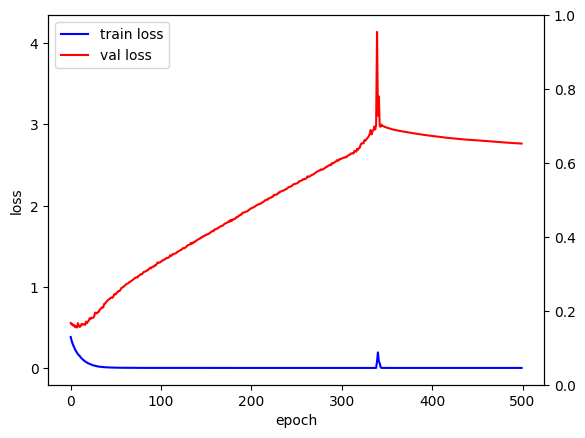

In [140]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# loss_ax.plot(tr_losses, 'y', label = 'train loss')
loss_ax.plot(tr_losses, 'b', label = 'train loss')
loss_ax.plot(val_losses, 'r', label = 'val loss')

# acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')

plt.show()

# 4. Model Test

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
model.eval()
correct_count = 0
with torch.no_grad():
    for batch_idx, samples in enumerate(test_dataloader):
        x_test, y_test = samples
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        y_test_pred = model(x_test)

        pred = torch.argmax(y_test_pred, dim=1)
        correct_count += accuracy_score(y_test.cpu(), pred.cpu(), normalize=False) ## normalize : If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.

print('accuracy on test set : ', correct_count / len(test_dataset))


accuracy on test set :  0.84375


**Interpretation**

0.6778205128205129
0.84375


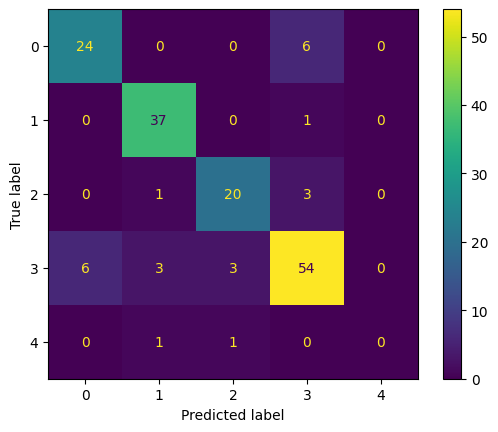

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
cm = confusion_matrix(y_test.cpu(), torch.argmax(y_test_pred,1).cpu(), labels=[0,1,2,3,4])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()

print(f1_score(y_test.cpu(), torch.argmax(y_test_pred,1).cpu(), average='macro'))